# ANALISIS DEL PROBLEMA

El conjunto de datos contiene imágenes de 525 especies de aves, divididas de la siguiente manera:

* Imágenes de entrenamiento: 84,635 imágenes
* Imágenes de prueba: 2,625 imágenes (5 imágenes por especie)
* Imágenes de validación: 2,625 imágenes (5 imágenes por especie)
Cada imagen contiene solo un ave y esta ocupa al menos el 50% de los píxeles de la imagen, lo que asegura una alta calidad en los datos.

### Objetivo
El objetivo principal es construir un modelo que pueda clasificar las imágenes en una de las 525 especies de aves con alta precisión.

# Carga de datos

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_generator = datagen.flow_from_directory(
    'archive/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_generator = datagen.flow_from_directory(
    'archive/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 76382 images belonging to 525 classes.
Found 8253 images belonging to 525 classes.


# Visualización

Se crea una funcion para mostrar algunas de las imagenes con las que vamos a trabajar.

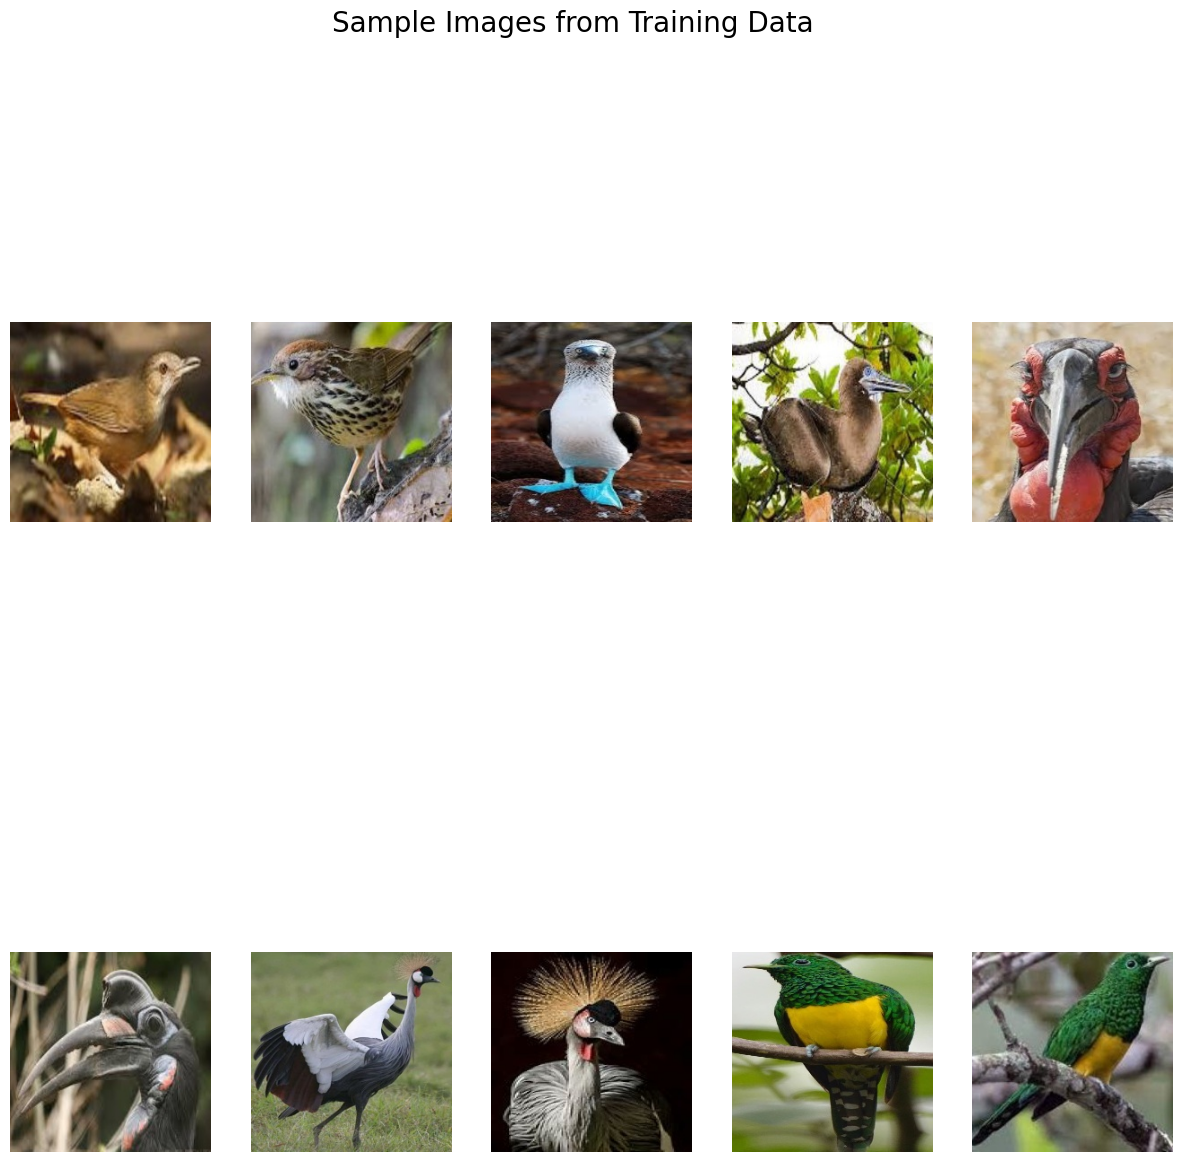

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import math

# Define the path to the training data
train_data_path = 'archive/train'

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(15, 15))
    columns = 5
    rows = math.ceil(len(images) / columns)
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.suptitle(title, fontsize=20)
    plt.show()

# Collect a few sample images
sample_images = []
for category in os.listdir(train_data_path):
    category_path = os.path.join(train_data_path, category)
    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        for _ in range(2):  # Select 2 random images from each category
            image_file = random.choice(image_files)
            image_path = os.path.join(category_path, image_file)
            image = Image.open(image_path)
            sample_images.append(image)
            if len(sample_images) >= 10:
                break
    if len(sample_images) >= 10:
        break

# Display the collected images
display_images(sample_images, title='Sample Images from Training Data')


# Preparación de los datos

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(525, activation='softmax')
])

base_model.trainable = False  # Freezing the base model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Modelo deep learning

Se entrena el modelo, en este caso se hizo con solo 5 epocas porque cada entrenamiento es demasiado procesamiento y se dura aproximadamente 1 hora por epoca. Anteriormente se intentó con 50 epocas.

In [5]:
import PIL.Image

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 3287s 1s/step - accuracy: 0.0056 - loss: 6.1094 - val_accuracy: 0.0042 - val_loss: 6.1132
Epoch 2/5
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 3269s 1s/step - accuracy: 0.0056 - loss: 6.0921 - val_accuracy: 0.0045 - val_loss: 6.1129
Epoch 3/5
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 3279s 1s/step - accuracy: 0.0062 - loss: 6.0769 - val_accuracy: 0.0052 - val_loss: 6.1006
Epoch 4/5
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 3276s 1s/step - accuracy: 0.0054 - loss: 6.0641 - val_accuracy: 0.0051 - val_loss: 6.0774
Epoch 5/5
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 3303s 1s/step - accuracy: 0.0055 - loss: 6.0493 - val_accuracy: 0.0042 - val_loss: 6.0714


# Evaluación

In [6]:
# Evaluate the model
test_generator = datagen.flow_from_directory(
    'archive/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')

Found 2625 images belonging to 525 classes.
83/83 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.0033 - loss: 6.0566
Test accuracy: 0.005333333276212215


# Resultados

Después de entrenar el modelo con 5 épocas, los resultados obtenidos muestran una precisión muy baja (0.0033) y una pérdida alta (6.0566). La precisión en el conjunto de prueba es igualmente baja (0.0053). Estos resultados indican que el modelo no está aprendiendo de manera efectiva a clasificar las imágenes de aves. Varias razones pueden contribuir a este rendimiento deficiente:

* Entrenamiento Insuficiente: Con solo 5 épocas, el modelo no ha tenido suficiente tiempo para aprender las características relevantes de las imágenes, no se hicieron mas epocas porque cada epoca duraba 1 hora aproximadamente.
* Tasa de Aprendizaje: Una tasa de aprendizaje inapropiada puede causar que el modelo no converja adecuadamente.
* Preprocesamiento de Datos: Puede haber una falta de variabilidad en los datos de entrenamiento debido a una insuficiente augmentación de datos.
* Arquitectura del Modelo: La arquitectura del modelo puede no ser la óptima para esta tarea específica.